<a href="https://colab.research.google.com/github/COMP-380-DATA-SCIENCE/leaf-disease-classifier/blob/main/Leaf_Disease_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.28
    Uninstalling SQLAlchemy-2.0.28:
      Successfully uninstalled SQLAlchemy-2.0.28
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.52 which is incompatible.


In [ ]:
!pip install datasets[vision]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from datasets import list_datasets, load_dataset
from PIL import Image

In [ ]:
#Loads dataset from Huggingface
dataset = load_dataset("Treelar/plant_village", split = "train")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/55447 [00:00<?, ? examples/s]

In [ ]:
#Split Dataset into two categories training and testing
splits = dataset.train_test_split(test_size=0.2)
train_ds = splits["train"]
test_ds = splits["test"]
#train_ds.features

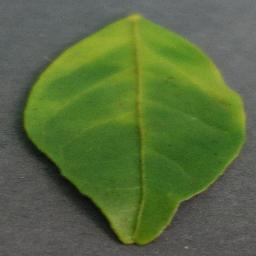

In [ ]:
train_ds[0]['image']

In [ ]:
id2label = {id: label for id, label in enumerate(train_ds.features['label'].names)}
label2id = {label:id for id,label in id2label.items()}

In [ ]:
train_ds[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 'label': 16}

array([[[160, 148, 152],
        [161, 149, 153],
        [161, 149, 153],
        ...,
        [145, 129, 130],
        [142, 126, 127],
        [140, 124, 125]],

       [[160, 148, 152],
        [160, 148, 152],
        [160, 148, 152],
        ...,
        [141, 125, 126],
        [139, 123, 124],
        [138, 122, 123]],

       [[162, 150, 154],
        [161, 149, 153],
        [160, 148, 152],
        ...,
        [141, 125, 126],
        [142, 126, 127],
        [142, 126, 127]],

       ...,

       [[151, 144, 151],
        [150, 143, 150],
        [148, 141, 148],
        ...,
        [ 94,  84,  83],
        [ 92,  82,  81],
        [ 92,  82,  81]],

       [[148, 141, 148],
        [147, 140, 147],
        [147, 140, 147],
        ...,
        [ 93,  83,  82],
        [ 92,  82,  81],
        [ 91,  81,  80]],

       [[144, 137, 144],
        [144, 137, 144],
        [145, 138, 145],
        ...,
        [ 93,  83,  82],
        [ 92,  82,  81],
        [ 91,  81,  80]]], dtype=uint8)
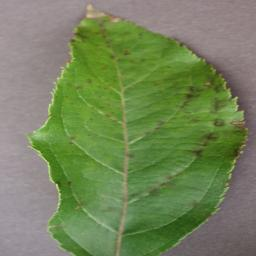

In [ ]:
#Converts image to a numpy array
image_array = tf.keras.utils.img_to_array(dataset[0]['image'], dtype=np.uint8)
image_array

In [ ]:
#Transforms the image
def train_transforms(examples):
    #Stores shape, dtype, and numpy array into pixel values
    examples['pixel_values'] = [tf.convert_to_tensor(tf.keras.utils.img_to_array(image.resize([192,192]).convert("RGB"))) for image in examples['image']]
    #stores labes in labels
    examples["labels"] = examples["label"]
    return examples

In [ ]:
#applies transform to images in dataset
prepared_train_ds = train_ds.with_transform(train_transforms)
prepared_train_ds[1000]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 'label': 36,
 'pixel_values': <tf.Tensor: shape=(192, 192, 3), dtype=float32, numpy=
 array([[[145., 125., 118.],
         [151., 131., 124.],
         [153., 133., 126.],
         ...,
         [197., 186., 182.],
         [209., 198., 194.],
         [204., 193., 189.]],
 
        [[139., 119., 112.],
         [144., 124., 117.],
         [159., 139., 132.],
         ...,
         [198., 187., 183.],
         [203., 192., 188.],
         [213., 202., 198.]],
 
        [[138., 118., 111.],
         [144., 124., 117.],
         [149., 129., 122.],
         ...,
         [209., 198., 194.],
         [205., 194., 190.],
         [207., 196., 192.]],
 
        ...,
 
        [[131., 115., 115.],
         [147., 131., 131.],
         [149., 133., 133.],
         ...,
         [157., 142., 145.],
         [153., 138., 141.],
         [169., 154., 157.]],
 
        [[143., 127., 127.],
         [162., 146., 146.],
  

In [ ]:
prepared_train_ds[0]['pixel_values'].shape

TensorShape([192, 192, 3])

In [ ]:
tf_ds = prepared_train_ds.to_tf_dataset(
            columns=["pixel_values"],
            label_cols=["label"],
            #batch_size=2, #change batch to 32
            batch_size=12,
            shuffle=True
            )

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:401: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [ ]:
prepared_test_ds = test_ds.with_transform(train_transforms)
val_ds = prepared_test_ds.to_tf_dataset(
            columns=["pixel_values"],
            label_cols=["label"],
            #batch_size=2, #change batch to 32
            batch_size=12,
            shuffle=True
            )

In [ ]:
prepared_test_ds[0]['pixel_values'].shape

TensorShape([192, 192, 3])

In [ ]:
min_rotation = float(-0.5)
max_rotation = float(0.5)
min_zoom = float(0.1)
max_zoom = float(0.3)
min_contrast = float(0.5)
max_contrast = float(1.5)
min_brightness = float(-0.7)
max_brightness = float(0.7)
min_translation = float(-0.2)
max_translation = float(0.2)

def augment_data(seed_value):
    augmentation = tf.keras.Sequential([
        tf.keras.layers.RandomRotation(
            factor = (min_rotation, max_rotation),
            seed=seed_value
            ),
        tf.keras.layers.RandomZoom(
            height_factor = (min_zoom, max_zoom),
            seed=seed_value
            ),
        tf.keras.layers.RandomFlip(
            mode="horizontal_and_vertical",
            seed=seed_value
            ),
        tf.keras.layers.RandomContrast(
            factor = (min_contrast,max_contrast),
            seed = seed_value
        ),
        tf.keras.layers.RandomTranslation(
            height_factor = (min_translation, max_translation),
            width_factor = (min_translation, max_translation),
            seed = seed_value
        ),
        tf.keras.layers.RandomBrightness(
            factor = (min_brightness,max_brightness),
            value_range=(0,1),
            seed = seed_value
        )
    ])
    return augmentation

augmentation_layer = augment_data(64)

In [ ]:
num_classes = len(id2label)
img_height,img_width = (192,192)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  augmentation_layer,
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'), #16
  tf.keras.layers.MaxPooling2D(3,3),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'), #32
  tf.keras.layers.MaxPooling2D(3,3),
  tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'), #128
  tf.keras.layers.MaxPooling2D(3,3),
  tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'), #added
  tf.keras.layers.MaxPooling2D(3,3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(2048, activation='relu'), #128
  tf.keras.layers.Dropout(0.3), #To avoid overfitting 0.5
  tf.keras.layers.Dense(2048, activation='relu'), #128
  tf.keras.layers.Dropout(0.3), #To avoid overfitting 0.5
  tf.keras.layers.Dense(num_classes, activation="softmax")
])

In [ ]:
opt= tf.keras.optimizers.Adam(learning_rate=0.0001) #slows down learning rate for smoother transition
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 192, 192, 3)       0         
                                                                 
 sequential (Sequential)     (None, 192, 192, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 192, 192, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 21, 21, 64)        0         
 g2D)                                                 

In [ ]:
overfit_protection = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    start_from_epoch=20
)

history = model.fit(
    tf_ds,
    validation_data = val_ds,
    epochs=100,
    verbose = 2,
    callbacks=[overfit_protection]
)
model.save('categorical_model_v8.keras')

Epoch 1/100
3697/3697 - 308s - loss: 2.5005 - sparse_categorical_accuracy: 0.3072 - val_loss: 1.7378 - val_sparse_categorical_accuracy: 0.4868 - 308s/epoch - 83ms/step
Epoch 2/100
3697/3697 - 266s - loss: 1.6973 - sparse_categorical_accuracy: 0.5030 - val_loss: 1.3767 - val_sparse_categorical_accuracy: 0.5872 - 266s/epoch - 72ms/step
Epoch 3/100
3697/3697 - 268s - loss: 1.3898 - sparse_categorical_accuracy: 0.5843 - val_loss: 1.2833 - val_sparse_categorical_accuracy: 0.6178 - 268s/epoch - 72ms/step
Epoch 4/100
3697/3697 - 303s - loss: 1.1800 - sparse_categorical_accuracy: 0.6431 - val_loss: 1.2893 - val_sparse_categorical_accuracy: 0.6398 - 303s/epoch - 82ms/step
Epoch 5/100
3697/3697 - 275s - loss: 1.0507 - sparse_categorical_accuracy: 0.6822 - val_loss: 0.9612 - val_sparse_categorical_accuracy: 0.7149 - 275s/epoch - 75ms/step
Epoch 6/100
3697/3697 - 250s - loss: 0.9477 - sparse_categorical_accuracy: 0.7088 - val_loss: 1.0491 - val_sparse_categorical_accuracy: 0.7109 - 250s/epoch - 68



```
# This is formatted as code
Epoch 1/100
4159/4159 [==============================] - 280s 67ms/step - loss: 2.3531 - sparse_categorical_accuracy: 0.3416 - val_loss: 1.6005 - val_sparse_categorical_accuracy: 0.5037
Epoch 2/100
4159/4159 [==============================] - 274s 66ms/step - loss: 1.5874 - sparse_categorical_accuracy: 0.5298 - val_loss: 1.5766 - val_sparse_categorical_accuracy: 0.5484
Epoch 3/100
4159/4159 [==============================] - 280s 67ms/step - loss: 1.2767 - sparse_categorical_accuracy: 0.6164 - val_loss: 1.4591 - val_sparse_categorical_accuracy: 0.6085
Epoch 4/100
4159/4159 [==============================] - 250s 60ms/step - loss: 1.0949 - sparse_categorical_accuracy: 0.6675 - val_loss: 1.3286 - val_sparse_categorical_accuracy: 0.6294
Epoch 5/100
4159/4159 [==============================] - 254s 61ms/step - loss: 0.9667 - sparse_categorical_accuracy: 0.7052 - val_loss: 1.6083 - val_sparse_categorical_accuracy: 0.6085
Epoch 6/100
4159/4159 [==============================] - 280s 67ms/step - loss: 0.8690 - sparse_categorical_accuracy: 0.7311 - val_loss: 1.1042 - val_sparse_categorical_accuracy: 0.6889
Epoch 7/100
4159/4159 [==============================] - 269s 65ms/step - loss: 0.7986 - sparse_categorical_accuracy: 0.7538 - val_loss: 0.9677 - val_sparse_categorical_accuracy: 0.7317
Epoch 8/100
4159/4159 [==============================] - 250s 60ms/step - loss: 0.7226 - sparse_categorical_accuracy: 0.7762 - val_loss: 0.6987 - val_sparse_categorical_accuracy: 0.7881
Epoch 9/100
4159/4159 [==============================] - 282s 68ms/step - loss: 0.6746 - sparse_categorical_accuracy: 0.7917 - val_loss: 0.5788 - val_sparse_categorical_accuracy: 0.8225
Epoch 10/100
4159/4159 [==============================] - 266s 64ms/step - loss: 0.6294 - sparse_categorical_accuracy: 0.8042 - val_loss: 0.6645 - val_sparse_categorical_accuracy: 0.8052
Epoch 11/100
4159/4159 [==============================] - 268s 64ms/step - loss: 0.5904 - sparse_categorical_accuracy: 0.8147 - val_loss: 0.5660 - val_sparse_categorical_accuracy: 0.8213
Epoch 12/100
4159/4159 [==============================] - 260s 63ms/step - loss: 0.5593 - sparse_categorical_accuracy: 0.8249 - val_loss: 0.6638 - val_sparse_categorical_accuracy: 0.8027
Epoch 13/100
4159/4159 [==============================] - 235s 56ms/step - loss: 0.5277 - sparse_categorical_accuracy: 0.8339 - val_loss: 0.6407 - val_sparse_categorical_accuracy: 0.8063
Epoch 14/100
4159/4159 [==============================] - 269s 65ms/step - loss: 0.5043 - sparse_categorical_accuracy: 0.8415 - val_loss: 0.5214 - val_sparse_categorical_accuracy: 0.8487
Epoch 15/100
4159/4159 [==============================] - 284s 68ms/step - loss: 0.4871 - sparse_categorical_accuracy: 0.8483 - val_loss: 0.4733 - val_sparse_categorical_accuracy: 0.8563
Epoch 16/100
4159/4159 [==============================] - 265s 64ms/step - loss: 0.4617 - sparse_categorical_accuracy: 0.8550 - val_loss: 0.3432 - val_sparse_categorical_accuracy: 0.8826
Epoch 17/100
4159/4159 [==============================] - 262s 63ms/step - loss: 0.4533 - sparse_categorical_accuracy: 0.8559 - val_loss: 0.4331 - val_sparse_categorical_accuracy: 0.8637
Epoch 18/100
4159/4159 [==============================] - 250s 60ms/step - loss: 0.4317 - sparse_categorical_accuracy: 0.8656 - val_loss: 0.5905 - val_sparse_categorical_accuracy: 0.8362
Epoch 19/100
4159/4159 [==============================] - 262s 63ms/step - loss: 0.4240 - sparse_categorical_accuracy: 0.8651 - val_loss: 0.3971 - val_sparse_categorical_accuracy: 0.8810
Epoch 20/100
4159/4159 [==============================] - 251s 60ms/step - loss: 0.4086 - sparse_categorical_accuracy: 0.8709 - val_loss: 0.5026 - val_sparse_categorical_accuracy: 0.8588
Epoch 21/100
4159/4159 [==============================] - 238s 57ms/step - loss: 0.3958 - sparse_categorical_accuracy: 0.8744 - val_loss: 0.4000 - val_sparse_categorical_accuracy: 0.8808
Epoch 22/100
4159/4159 [==============================] - 271s 65ms/step - loss: 0.3872 - sparse_categorical_accuracy: 0.8785 - val_loss: 0.4670 - val_sparse_categorical_accuracy: 0.8638
Epoch 23/100
4159/4159 [==============================] - 276s 66ms/step - loss: 0.3756 - sparse_categorical_accuracy: 0.8799 - val_loss: 0.4647 - val_sparse_categorical_accuracy: 0.8707
Epoch 24/100
4159/4159 [==============================] - 297s 71ms/step - loss: 0.3738 - sparse_categorical_accuracy: 0.8805 - val_loss: 0.6769 - val_sparse_categorical_accuracy: 0.8243
Epoch 25/100
4159/4159 [==============================] - 283s 68ms/step - loss: 0.3656 - sparse_categorical_accuracy: 0.8854 - val_loss: 0.4635 - val_sparse_categorical_accuracy: 0.8653
Epoch 26/100
4159/4159 [==============================] - 265s 64ms/step - loss: 0.3555 - sparse_categorical_accuracy: 0.8866 - val_loss: 0.6412 - val_sparse_categorical_accuracy: 0.8422
Epoch 27/100
4159/4159 [==============================] - 268s 64ms/step - loss: 0.3448 - sparse_categorical_accuracy: 0.8913 - val_loss: 0.4508 - val_sparse_categorical_accuracy: 0.8674
Epoch 28/100
4159/4159 [==============================] - 265s 64ms/step - loss: 0.3378 - sparse_categorical_accuracy: 0.8936 - val_loss: 0.4355 - val_sparse_categorical_accuracy: 0.8765
Epoch 29/100
4159/4159 [==============================] - 239s 58ms/step - loss: 0.3343 - sparse_categorical_accuracy: 0.8939 - val_loss: 0.3479 - val_sparse_categorical_accuracy: 0.8952
Epoch 30/100
4159/4159 [==============================] - 276s 66ms/step - loss: 0.3278 - sparse_categorical_accuracy: 0.8958 - val_loss: 0.3419 - val_sparse_categorical_accuracy: 0.9035
Epoch 31/100
4159/4159 [==============================] - 270s 65ms/step - loss: 0.3241 - sparse_categorical_accuracy: 0.8976 - val_loss: 0.4017 - val_sparse_categorical_accuracy: 0.8936
Epoch 32/100
4159/4159 [==============================] - 269s 65ms/step - loss: 0.3218 - sparse_categorical_accuracy: 0.8982 - val_loss: 0.4782 - val_sparse_categorical_accuracy: 0.8794
Epoch 33/100
4159/4159 [==============================] - 275s 66ms/step - loss: 0.3111 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.4441 - val_sparse_categorical_accuracy: 0.8786
Epoch 34/100
4159/4159 [==============================] - 296s 71ms/step - loss: 0.3078 - sparse_categorical_accuracy: 0.9010 - val_loss: 0.3852 - val_sparse_categorical_accuracy: 0.8925
Epoch 35/100
4159/4159 [==============================] - 292s 70ms/step - loss: 0.3026 - sparse_categorical_accuracy: 0.9032 - val_loss: 0.4596 - val_sparse_categorical_accuracy: 0.8795
Epoch 36/100
4159/4159 [==============================] - 274s 66ms/step - loss: 0.3009 - sparse_categorical_accuracy: 0.9042 - val_loss: 0.3123 - val_sparse_categorical_accuracy: 0.9035
Epoch 37/100
4159/4159 [==============================] - 260s 63ms/step - loss: 0.2868 - sparse_categorical_accuracy: 0.9091 - val_loss: 0.3724 - val_sparse_categorical_accuracy: 0.8961
Epoch 38/100
4159/4159 [==============================] - 274s 66ms/step - loss: 0.2942 - sparse_categorical_accuracy: 0.9064 - val_loss: 0.3415 - val_sparse_categorical_accuracy: 0.9109
Epoch 39/100
4159/4159 [==============================] - 284s 68ms/step - loss: 0.2887 - sparse_categorical_accuracy: 0.9091 - val_loss: 0.3024 - val_sparse_categorical_accuracy: 0.9142
Epoch 40/100
4159/4159 [==============================] - 274s 66ms/step - loss: 0.2863 - sparse_categorical_accuracy: 0.9107 - val_loss: 0.3471 - val_sparse_categorical_accuracy: 0.9039
Epoch 41/100
4159/4159 [==============================] - 292s 70ms/step - loss: 0.2750 - sparse_categorical_accuracy: 0.9122 - val_loss: 0.3937 - val_sparse_categorical_accuracy: 0.9014
Epoch 42/100
4159/4159 [==============================] - 273s 66ms/step - loss: 0.2782 - sparse_categorical_accuracy: 0.9121 - val_loss: 0.2290 - val_sparse_categorical_accuracy: 0.9300
Epoch 43/100
4159/4159 [==============================] - 271s 65ms/step - loss: 0.2826 - sparse_categorical_accuracy: 0.9110 - val_loss: 0.2265 - val_sparse_categorical_accuracy: 0.9360
Epoch 44/100
4159/4159 [==============================] - 252s 61ms/step - loss: 0.2730 - sparse_categorical_accuracy: 0.9134 - val_loss: 0.2986 - val_sparse_categorical_accuracy: 0.9142
Epoch 45/100
4159/4159 [==============================] - 261s 63ms/step - loss: 0.2685 - sparse_categorical_accuracy: 0.9156 - val_loss: 0.2236 - val_sparse_categorical_accuracy: 0.9356
Epoch 46/100
4159/4159 [==============================] - 292s 70ms/step - loss: 0.2690 - sparse_categorical_accuracy: 0.9149 - val_loss: 0.2514 - val_sparse_categorical_accuracy: 0.9255
Epoch 47/100
4159/4159 [==============================] - 278s 67ms/step - loss: 0.2585 - sparse_categorical_accuracy: 0.9196 - val_loss: 0.3882 - val_sparse_categorical_accuracy: 0.9008
Epoch 48/100
4159/4159 [==============================] - 275s 66ms/step - loss: 0.2657 - sparse_categorical_accuracy: 0.9156 - val_loss: 0.2210 - val_sparse_categorical_accuracy: 0.9349
Epoch 49/100
4159/4159 [==============================] - 270s 65ms/step - loss: 0.2635 - sparse_categorical_accuracy: 0.9174 - val_loss: 0.3215 - val_sparse_categorical_accuracy: 0.9165
Epoch 50/100
4159/4159 [==============================] - 295s 71ms/step - loss: 0.2612 - sparse_categorical_accuracy: 0.9178 - val_loss: 0.3644 - val_sparse_categorical_accuracy: 0.9046
Epoch 51/100
4159/4159 [==============================] - 291s 70ms/step - loss: 0.2555 - sparse_categorical_accuracy: 0.9193 - val_loss: 0.3588 - val_sparse_categorical_accuracy: 0.9042
Epoch 52/100
4159/4159 [==============================] - 256s 62ms/step - loss: 0.2579 - sparse_categorical_accuracy: 0.9200 - val_loss: 0.3360 - val_sparse_categorical_accuracy: 0.9133
Epoch 53/100
4159/4159 [==============================] - 264s 63ms/step - loss: 0.2551 - sparse_categorical_accuracy: 0.9191 - val_loss: 0.2275 - val_sparse_categorical_accuracy: 0.9369
Epoch 54/100
4159/4159 [==============================] - 277s 67ms/step - loss: 0.2422 - sparse_categorical_accuracy: 0.9237 - val_loss: 0.2640 - val_sparse_categorical_accuracy: 0.9235
Epoch 55/100
4159/4159 [==============================] - 292s 70ms/step - loss: 0.2483 - sparse_categorical_accuracy: 0.9213 - val_loss: 0.2136 - val_sparse_categorical_accuracy: 0.9392
Epoch 56/100
4159/4159 [==============================] - 296s 71ms/step - loss: 0.2467 - sparse_categorical_accuracy: 0.9211 - val_loss: 0.3449 - val_sparse_categorical_accuracy: 0.9113
Epoch 57/100
4159/4159 [==============================] - 269s 65ms/step - loss: 0.2400 - sparse_categorical_accuracy: 0.9241 - val_loss: 0.2222 - val_sparse_categorical_accuracy: 0.9392
Epoch 58/100
4159/4159 [==============================] - 292s 70ms/step - loss: 0.2414 - sparse_categorical_accuracy: 0.9244 - val_loss: 0.3177 - val_sparse_categorical_accuracy: 0.9160
```



In [ ]:
class_names = []
for label in id2label.values():
  class_names.append(label)
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot'

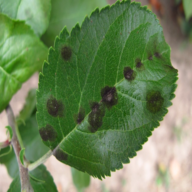

In [ ]:
img_path = '/content/apple_scab.jpg'
img = Image.open(img_path).convert("RGB")
#img = img.resize((256,192),resample=Image.BILINEAR)
#img = img.crop((0,0,192,192))
img = img.resize((192,192),resample=Image.BILINEAR)
img_array = tf.keras.utils.img_to_array(img, dtype=np.uint8)
img_array = img_array[np.newaxis]
img

In [ ]:
prediction = model.predict(img_array)
test_label = class_names[np.argmax(prediction[0])]
test_label

1/1 [==============================] - 0s 18ms/step


'Apple___Apple_scab'

In [ ]:
import random
verification_index = random.randint(0,5544)
test_image = prepared_test_ds[verification_index]['pixel_values']
test_image = test_image[np.newaxis]
test_image.shape
test_prediction = model.predict(test_image)
test_label = class_names[np.argmax(test_prediction[0])]
test_label

1/1 [==============================] - 0s 17ms/step


'Peach___Bacterial_spot'

In [ ]:
class_names[prepared_test_ds[verification_index]['label']]

'Grape___Esca_(Black_Measles)'

array([[[172, 161, 159],
        [152, 141, 139],
        [154, 143, 141],
        ...,
        [157, 144, 136],
        [167, 154, 146],
        [153, 140, 132]],

       [[168, 157, 155],
        [144, 133, 131],
        [151, 140, 138],
        ...,
        [147, 134, 126],
        [160, 147, 139],
        [154, 141, 133]],

       [[170, 159, 157],
        [167, 156, 154],
        [148, 137, 135],
        ...,
        [151, 138, 130],
        [143, 130, 122],
        [160, 147, 139]],

       ...,

       [[175, 161, 158],
        [172, 158, 155],
        [169, 155, 152],
        ...,
        [147, 132, 125],
        [141, 126, 119],
        [133, 118, 111]],

       [[185, 171, 168],
        [178, 164, 161],
        [169, 155, 152],
        ...,
        [151, 136, 129],
        [136, 121, 114],
        [128, 113, 106]],

       [[182, 168, 165],
        [174, 160, 157],
        [163, 149, 146],
        ...,
        [139, 124, 117],
        [136, 121, 114],
        [146, 131, 124]]], dtype=uint8)
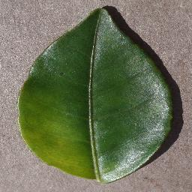

In [ ]:
verification_image = tf.keras.utils.img_to_array(prepared_test_ds[verification_index]['pixel_values'], dtype=np.uint8)
verification_image

In [ ]:
loss, acc = model.evaluate(val_ds, verbose=2)

925/925 - 40s - loss: 0.4092 - sparse_categorical_accuracy: 0.8789 - 40s/epoch - 44ms/step
